In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from sklearn.linear_model import LogisticRegression
from ipywidgets import Output

In [2]:
data = pd.read_csv('/content/drive/data.txt', header= None, names = ['X0', 'X1', 'y'])
data.head()

,X0,X1,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


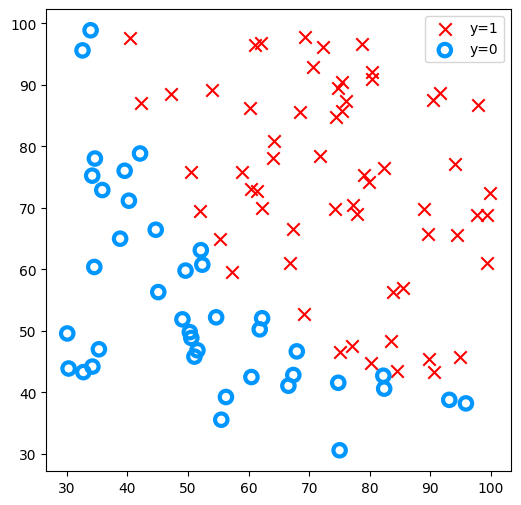

In [3]:
X_train = data[['X0', 'X1']].values
y_train = data['y'].values

pos_label = "y=1"
neg_label = "y=0"

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

pos = y_train == 1
neg = y_train == 0

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c='red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [4]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [5]:
min_x0, max_x0 = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
min_x1, max_x1 = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

x0_grid = np.arange(min_x0, max_x0, 0.1)
x1_grid = np.arange(min_x1, max_x1, 0.1)

xx, yy = np.meshgrid(x0_grid, x1_grid)

r0, r1 = xx.flatten(), yy.flatten()
r0, r1 = r0.reshape((len(r0), 1)), r1.reshape((len(r1), 1))

grid = np.hstack((r0, r1))

In [6]:
predictions = log_reg_model.predict(grid)

zz = predictions.reshape(xx.shape)


/tmp/ipykernel_42/3712044387.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[row_indices, 0], X_train[row_indices, 1], cmap='inferno', label=f'Class {class_val}')


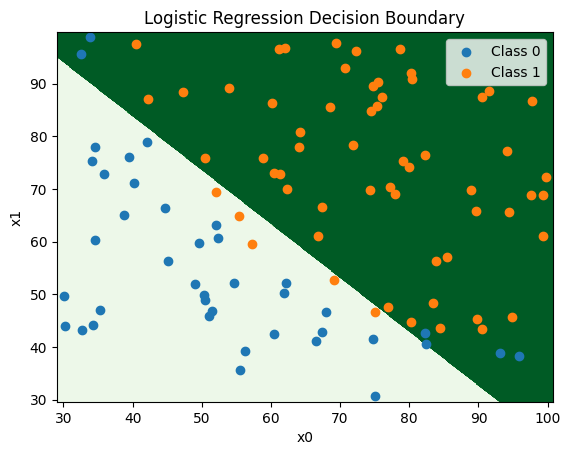

In [17]:
plt.contourf(xx, yy, zz, cmap='Greens')

for class_val in np.unique(y_train):
    row_indices = np.where(y_train == class_val)
    plt.scatter(X_train[row_indices, 0], X_train[row_indices, 1], cmap='inferno', label=f'Class {class_val}')

plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()